# RNA Model Demo

## Set up

[RNA_simulation.py](RNA_simulation.py) requires:

* [Vienna RNA package](http://www.tbi.univie.ac.at/RNA/#download) version 2.1.9.  Install the package with Python bindings to be able to import the RNA package.

* [python](https://www.python.org/) version 2.7.

* [numpy](http://www.numpy.org/) version 1.11 or later.

* [pandas](http://pandas.pydata.org/) version 0.18 or later.

Every time you load [RNA_simulation.py](RNA_simulation.py) (next command) the numpy random number seed is reset to the same state.

In [1]:
run ./RNA_simulation.py

This notebook also requires:

* [matplotlib](http://matplotlib.org/)

* [seaborn](http://seaborn.pydata.org)

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sns.set_context("talk")

## Simulation

To demo our code, we use the first sequence in [Reference_seqs/Ref_alpha_12](Reference_seqs/Ref_alpha_12) (containing the $10^3$ reference sequences used in the simulations with $\alpha=12$).

In [4]:
ref_seq = 'UAGACUAUAAAGUACCGGGAUCUAUUGAAUGUUGGUACCCCUUUCGAGUGAUUGCGCCCCAGUCCGUGAACUAGGAUGCAUAUUUACCUAUUCAGAGGAU'

We define an `Evolution` object and set $\alpha = 12$.

In [5]:
evo = Evolution(ref_seq, alpha=12)

We run a simulation after setting the following parameters:

* `divergence`: the number of substitutions during evolution 

* `burnin`: the length of the burn-in period

In [6]:
evo.evolve(divergence=20, burnin=200, verbose=True)

Substitutions: 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20


The following conducts three additional analyses on the simulation results and saves summary statistics to a dictionary:
    
* Measures the degree of reproductive isolation (RI) between lineages after each substitution.

* Calculates the average holeyness of the fitness landscape traversed by the diverging lineages.

In [7]:
results = evo.stats

The following shows the accumulation of inviable introgressions in this simulation.

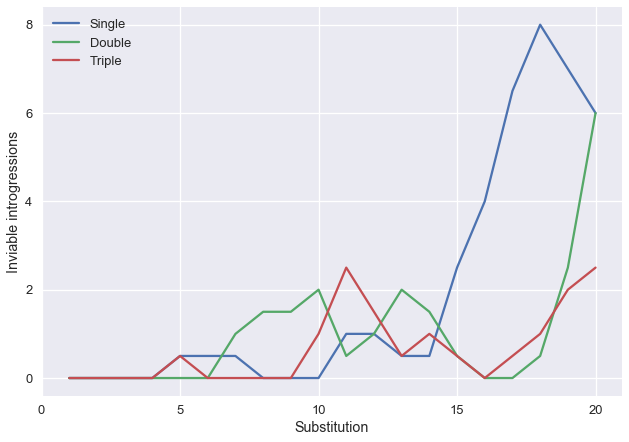

In [11]:
x = np.arange(1, 21, 1)
a = np.array([len(j) for j in results['single']])
b = np.array([len(j) for j in results['single_inv']])
single_inviable  = (a + b) / 2.
plt.plot(x, single_inviable, clip_on=False, label='Single')
a = np.array([len(j) for j in results['double']])
b = np.array([len(j) for j in results['double_inv']])
double_inviable  = (a + b) / 2.
plt.plot(x, double_inviable, clip_on=False, label='Double')
a = np.array([len(j) for j in results['triple']])
b = np.array([len(j) for j in results['triple_inv']])
triple_inviable  = (a + b) / 2.
plt.plot(x, triple_inviable, clip_on=False, label='Triple')
plt.legend(loc='best')
plt.xticks(np.arange(0, 21, 5))
plt.yticks(np.arange(0, 10, 2))
plt.ylabel('Inviable introgressions')
plt.xlabel('Substitution');